Let's Import Libraries and Data!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('coin_Bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


Data Cleaning

In [5]:
#To improve clarity of viewing the numbers let's round them up to 3 decimals
pd.set_option('display.float_format',lambda x : '%.3f' % x)
df['Date']=df['Date'].str.split(' ').str[0]
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488,134.000,134.444,144.540,0.000,1603768864.500
1,2,Bitcoin,BTC,2013-04-30,146.930,134.050,144.000,139.000,0.000,1542813125.000
2,3,Bitcoin,BTC,2013-05-01,139.890,107.720,139.000,116.990,0.000,1298954593.750
3,4,Bitcoin,BTC,2013-05-02,125.600,92.282,116.380,105.210,0.000,1168517495.250
4,5,Bitcoin,BTC,2013-05-03,108.128,79.100,106.250,97.750,0.000,1085995168.750
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.589,32770.681,33549.600,33897.049,38728974942.250,635450784106.090
2987,2988,Bitcoin,BTC,2021-07-03,34909.260,33402.697,33854.421,34668.548,24383958643.260,649939701346.230
2988,2989,Bitcoin,BTC,2021-07-04,35937.567,34396.477,34665.565,35287.780,24924307911.110,661574836314.860
2989,2990,Bitcoin,BTC,2021-07-05,35284.344,33213.661,35284.344,33746.002,26721554282.070,632696207199.700


In [6]:
df.set_index('SNo', inplace=True)
df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Bitcoin,BTC,2013-04-29,147.488,134.000,134.444,144.540,0.000,1603768864.500
2,Bitcoin,BTC,2013-04-30,146.930,134.050,144.000,139.000,0.000,1542813125.000
3,Bitcoin,BTC,2013-05-01,139.890,107.720,139.000,116.990,0.000,1298954593.750
4,Bitcoin,BTC,2013-05-02,125.600,92.282,116.380,105.210,0.000,1168517495.250
5,Bitcoin,BTC,2013-05-03,108.128,79.100,106.250,97.750,0.000,1085995168.750
...,...,...,...,...,...,...,...,...,...
2987,Bitcoin,BTC,2021-07-02,33939.589,32770.681,33549.600,33897.049,38728974942.250,635450784106.090
2988,Bitcoin,BTC,2021-07-03,34909.260,33402.697,33854.421,34668.548,24383958643.260,649939701346.230
2989,Bitcoin,BTC,2021-07-04,35937.567,34396.477,34665.565,35287.780,24924307911.110,661574836314.860


In [35]:
 #let's check the number of rows and columns in our data
df.shape

(2991, 6)

In [7]:
#Let's check null values and data types in the data
df.info()
# No null value found but the column 'Date' is in the wrong data type

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 1 to 2991
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2991 non-null   object 
 1   Symbol     2991 non-null   object 
 2   Date       2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), object(3)
memory usage: 233.7+ KB


In [8]:
# Let's change the data type of 'Date' column to datetime 
df['Date']=pd.to_datetime(df['Date'])
df.dtypes
#Date column has changed to datetime64 data type

Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [10]:
df.isnull().sum() #No null values found! Great!

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [38]:
#Let's check for duplicate values in our data
df.duplicated()
# No duplicate values found!

SNo
1       False
2       False
3       False
4       False
5       False
        ...  
2987    False
2988    False
2989    False
2990    False
2991    False
Length: 2991, dtype: bool

In [12]:
# Now let's drop unnecssary columns to improve clarity
df.drop(columns=['Symbol','Name','Marketcap'],inplace=True)

In [13]:
df

,Date,High,Low,Open,Close,Volume
SNo,,,,,,
1,2013-04-29,147.488,134.000,134.444,144.540,0.000
2,2013-04-30,146.930,134.050,144.000,139.000,0.000
3,2013-05-01,139.890,107.720,139.000,116.990,0.000
4,2013-05-02,125.600,92.282,116.380,105.210,0.000
5,2013-05-03,108.128,79.100,106.250,97.750,0.000
...,...,...,...,...,...,...
2987,2021-07-02,33939.589,32770.681,33549.600,33897.049,38728974942.250
2988,2021-07-03,34909.260,33402.697,33854.421,34668.548,24383958643.260
2989,2021-07-04,35937.567,34396.477,34665.565,35287.780,24924307911.110


In [14]:
#Let's explor some statistical information from the data
df.describe()

,Date,High,Low,Open,Close,Volume
count,2991,2991.000,2991.000,2991.000,2991.000,2991.000
mean,2017-06-02 00:00:00,6893.326,6486.010,6700.146,6711.290,10906334004.867
min,2013-04-29 00:00:00,74.561,65.526,68.505,68.431,0.000
25%,2015-05-16 12:00:00,436.179,422.879,430.445,430.569,30367250.000
50%,2017-06-02 00:00:00,2387.610,2178.500,2269.890,2286.410,946035968.000
75%,2019-06-19 12:00:00,8733.927,8289.800,8569.656,8576.239,15920149610.469
max,2021-07-06 00:00:00,64863.099,62208.964,63523.755,63503.458,350967941479.060
std,NaN,11642.832,10869.032,11288.044,11298.142,18888952979.843


In [ ]:
#The market capitalization of Bitcoin, which is the total value of all Bitcoins in circulation, ranged from around $187 billion to over $1.1 trillion during the given period. 
#This highlights the growing importance and adoption of Bitcoin as a digital asset.

In [15]:
df.corr()

,Date,High,Low,Open,Close,Volume
Date,1.000,0.667,0.672,0.669,0.669,0.718
High,0.667,1.000,0.999,0.999,0.999,0.810
Low,0.672,0.999,1.000,0.999,0.999,0.803
Open,0.669,0.999,0.999,1.000,0.999,0.808
Close,0.669,0.999,0.999,0.999,1.000,0.807
Volume,0.718,0.810,0.803,0.808,0.807,1.000


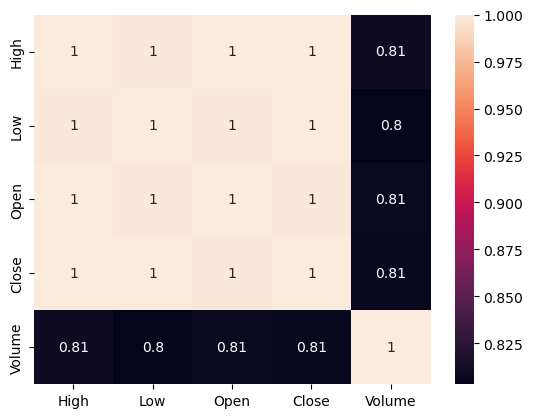

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(8,6)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

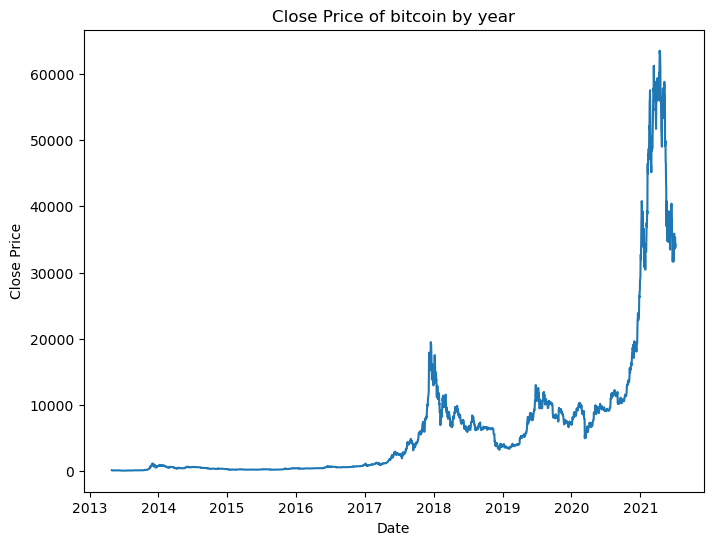

In [17]:
plt.style.use('default')
plt.figure(figsize=(8,6))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Date'],df['Close'])
plt.title('Close Price of bitcoin by year')
plt.show

E:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

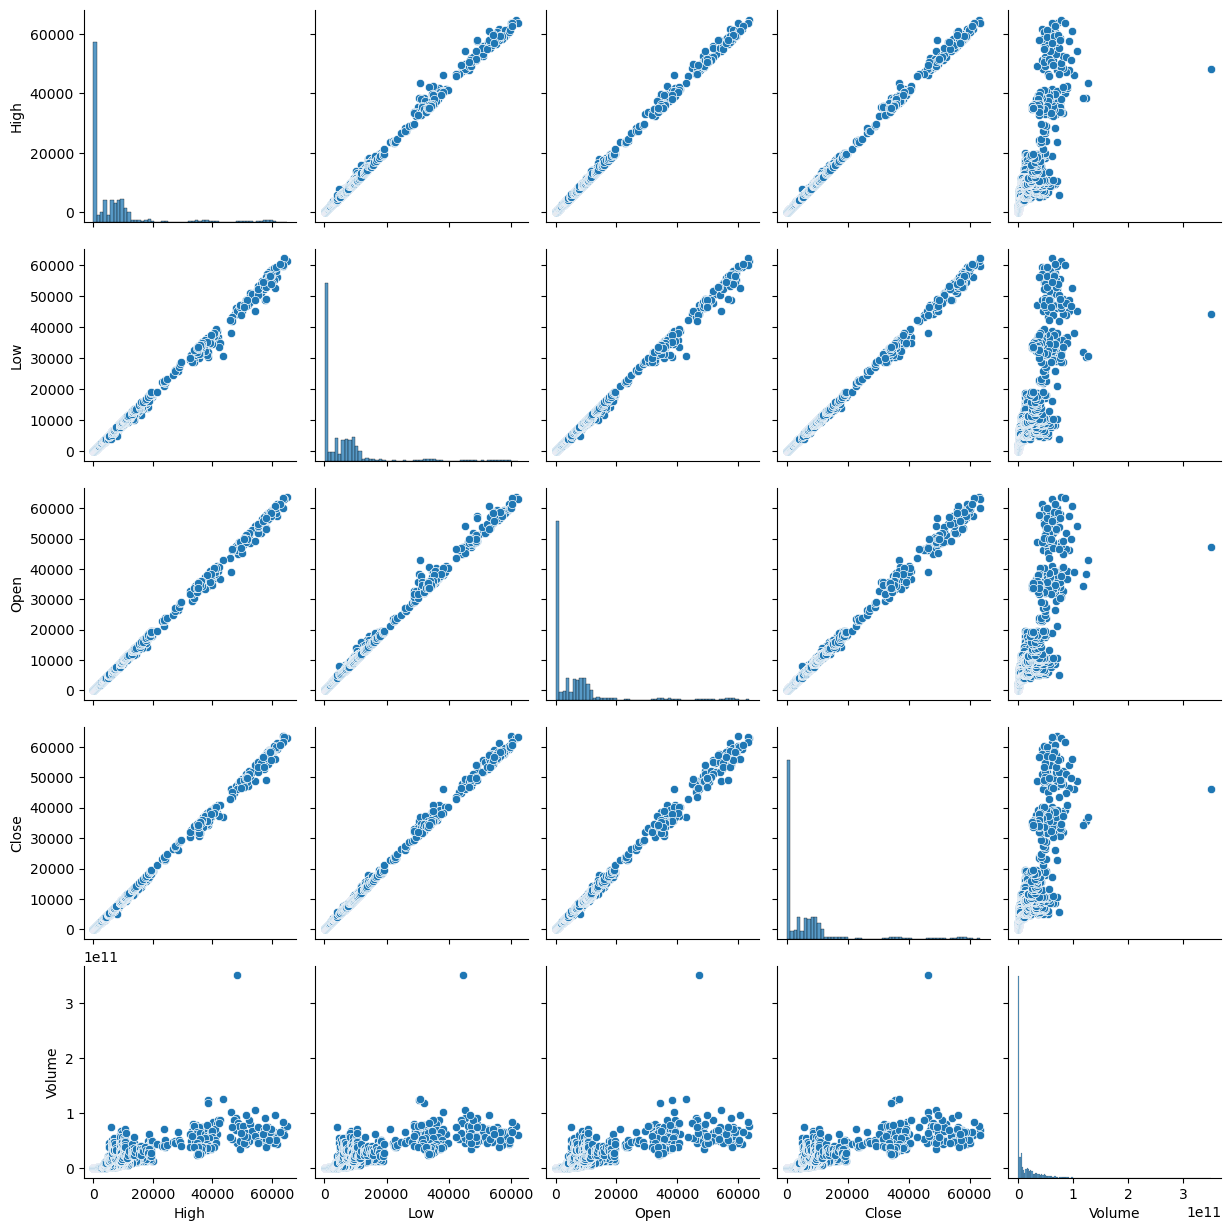

In [18]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [19]:
df.dtypes

Date      datetime64[ns]
High             float64
Low              float64
Open             float64
Close            float64
Volume           float64
dtype: object

In [20]:
highest_close=df.resample('Y', on='Date')['Close'].max()
highest_close

Date
2013-12-31    1151.170
2014-12-31     953.290
2015-12-31     465.321
2016-12-31     975.921
2017-12-31   19497.400
2018-12-31   17527.000
2019-12-31   13016.232
2020-12-31   29001.720
2021-12-31   63503.458
Freq: A-DEC, Name: Close, dtype: float64

In [21]:
lowest_close= df.resample('Y', on='Date')['Close'].min()
lowest_close

Date
2013-12-31      68.431
2014-12-31     310.737
2015-12-31     178.103
2016-12-31     364.331
2017-12-31     777.757
2018-12-31    3236.762
2019-12-31    3399.472
2020-12-31    4970.788
2021-12-31   29374.152
Freq: A-DEC, Name: Close, dtype: float64

In [22]:
average_close= df.resample('Y', on='Date')['Close'].mean()
average_close

Date
2013-12-31     257.974
2014-12-31     527.236
2015-12-31     272.453
2016-12-31     568.492
2017-12-31    4006.034
2018-12-31    7572.299
2019-12-31    7395.246
2020-12-31   11116.378
2021-12-31   45539.276
Freq: A-DEC, Name: Close, dtype: float64

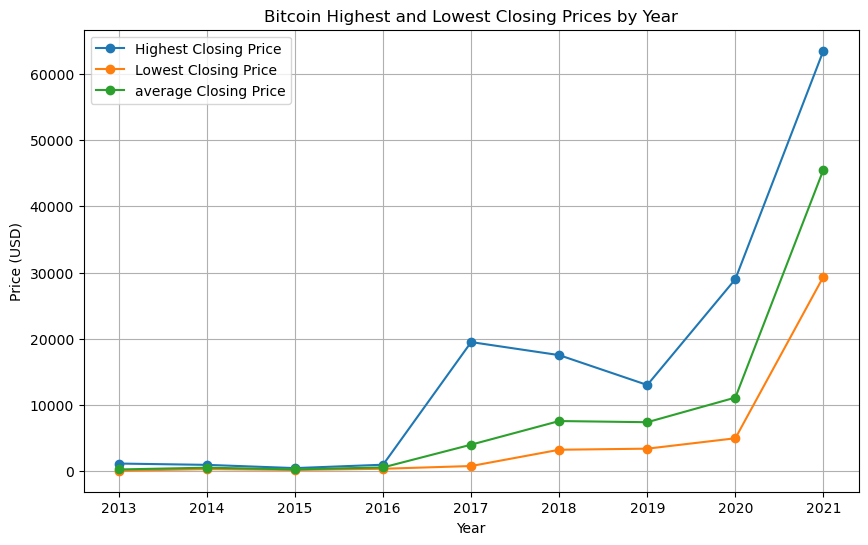

In [23]:
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.plot(highest_close.index.year, highest_close.values, label='Highest Closing Price', marker='o')
plt.plot(lowest_close.index.year, lowest_close.values, label='Lowest Closing Price', marker='o')
plt.plot(average_close.index.year, average_close.values, label='average Closing Price', marker='o')
plt.title('Bitcoin Highest and Lowest Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
highest_volume = df.resample('Y', on='Date')['Volume'].max()
lowest_volume = df.resample('Y', on='Date')['Volume'].min()

In [25]:
highest_volume, lowest_volume

(Date
 2013-12-31       46862700.000
 2014-12-31      126314000.000
 2015-12-31      263900000.000
 2016-12-31      363320992.000
 2017-12-31    22197999616.000
 2018-12-31    23840899072.000
 2019-12-31    45105733173.189
 2020-12-31    74156772074.960
 2021-12-31   350967941479.060
 Freq: A-DEC, Name: Volume, dtype: float64,
 Date
 2013-12-31             0.000
 2014-12-31       2857830.000
 2015-12-31       7860650.000
 2016-12-31      28514000.000
 2017-12-31      60851700.000
 2018-12-31    2923670016.000
 2019-12-31    4324200990.195
 2020-12-31   12252601474.785
 2021-12-31   24383958643.260
 Freq: A-DEC, Name: Volume, dtype: float64)

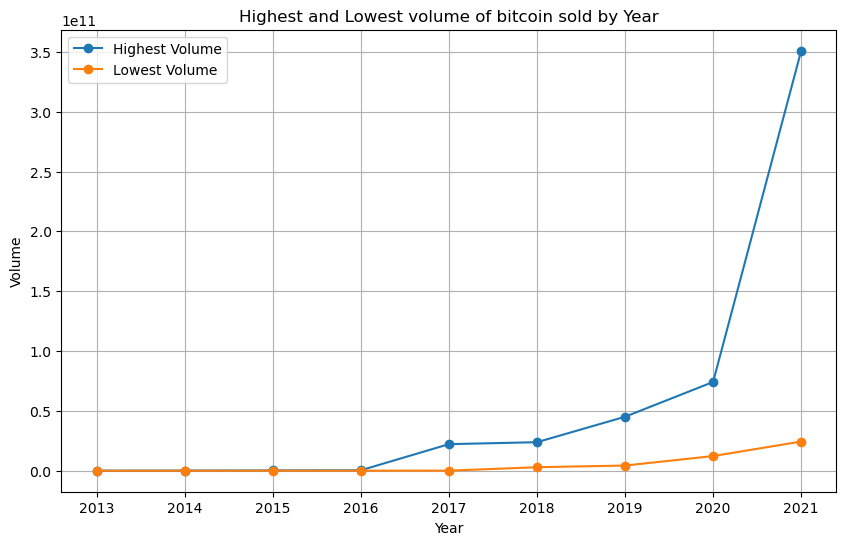

In [26]:
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.plot(highest_volume.index.year, highest_volume.values, label='Highest Volume', marker='o')
plt.plot(lowest_volume.index.year, lowest_volume.values, label='Lowest Volume', marker='o')
plt.title('Highest and Lowest volume of bitcoin sold by Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
last_12_months = df[df['Date'] >= df['Date'].max() - pd.DateOffset(months=12)]

# Calculate rolling statistics for the last 12 months
rolling_stats = last_12_months.rolling(window='30D', on='Date').mean()

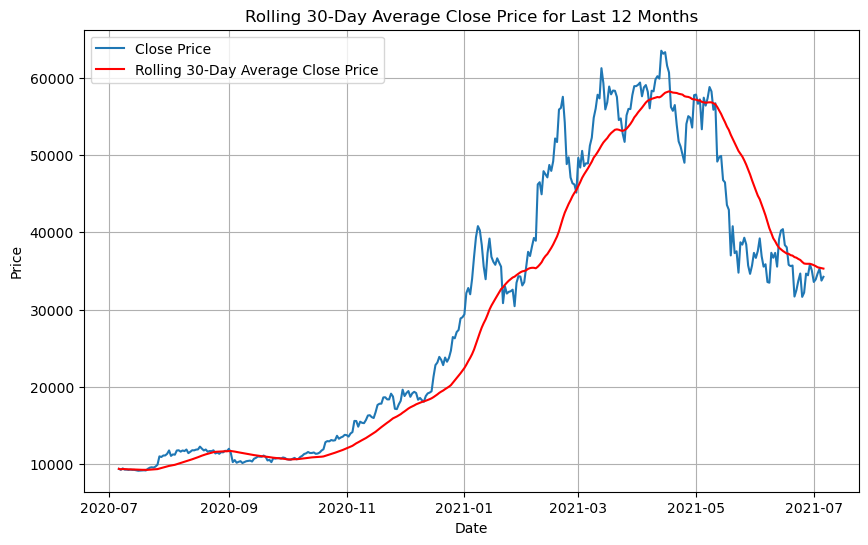

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(last_12_months['Date'], last_12_months['Close'], label='Close Price')
plt.plot(rolling_stats['Date'], rolling_stats['Close'], label='Rolling 30-Day Average Close Price', color='red')
plt.title('Rolling 30-Day Average Close Price for Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\rn2\AppData\Local\Temp\ipykernel_11396\1466262213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_12_months.loc[:, 'Month'] = last_12_months['Date'].dt.month


<Figure size 1000x600 with 0 Axes>

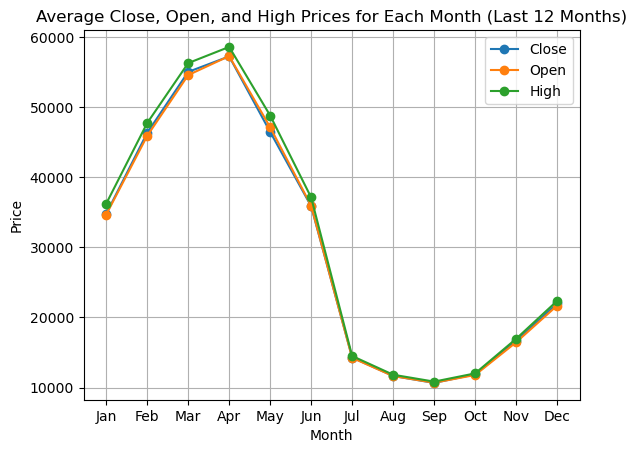

In [29]:
last_12_months.loc[:, 'Month'] = last_12_months['Date'].dt.month
average_prices = last_12_months.groupby('Month')[['Close', 'Open', 'High']].mean()
plt.figure(figsize=(10, 6))
average_prices.plot(marker='o')
plt.title('Average Close, Open, and High Prices for Each Month (Last 12 Months)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

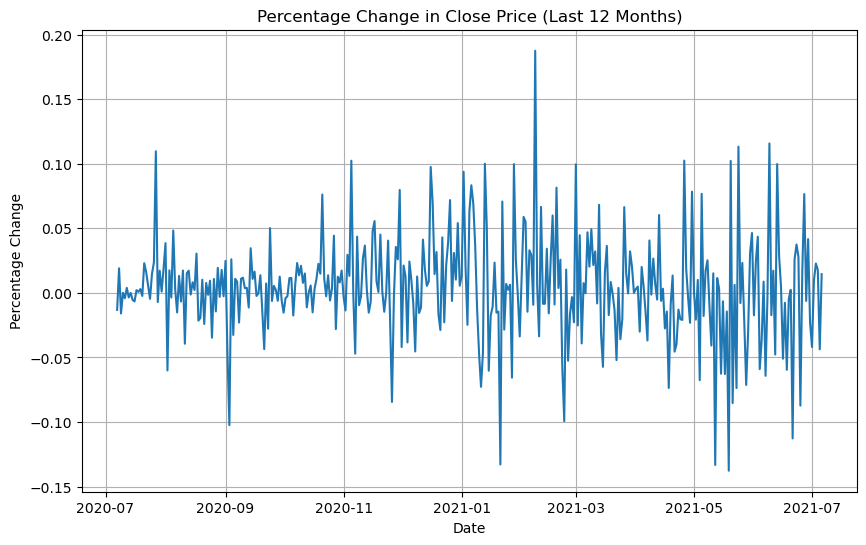

In [51]:
percentage_change = last_12_months['Close'].pct_change()
plt.figure(figsize=(10, 6))
plt.plot(last_12_months['Date'],percentage_change)
plt.title('Percentage Change in Close Price (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show

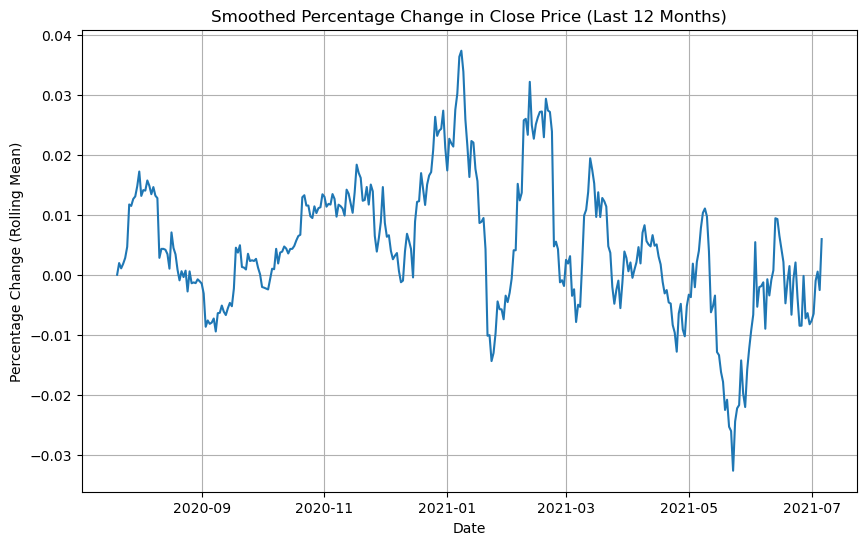

In [50]:
rolling_mean = percentage_change.rolling(window=15).mean()  # Adjusting window size to 15days
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(last_12_months['Date'], rolling_mean)
plt.title('Smoothed Percentage Change in Close Price (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (Rolling Mean)')
plt.grid(True)
plt.show()

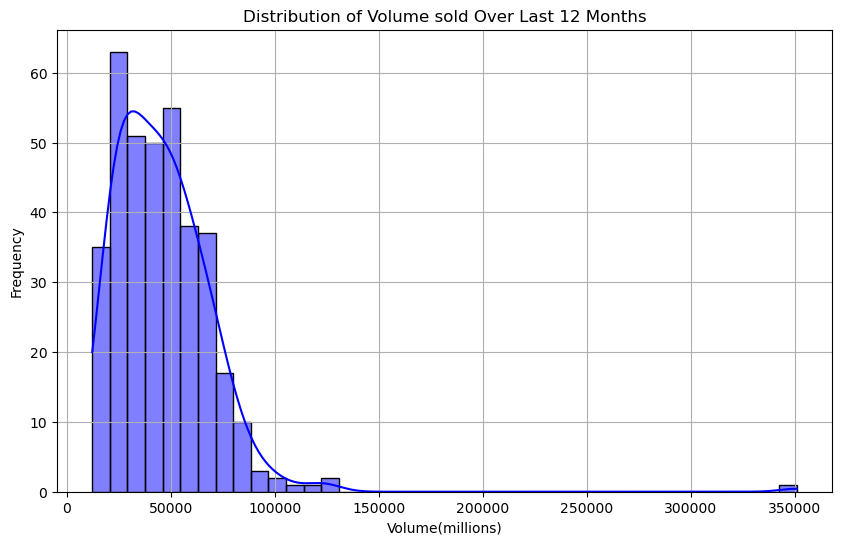

In [32]:
Volume_mill= last_12_months['Volume'] / 1000000 #to convert in millions unit
plt.figure(figsize=(10, 6))
sns.histplot(Volume_mill, kde=True, color='blue')
plt.title('Distribution of Volume sold Over Last 12 Months')
plt.xlabel('Volume(millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()